In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

plt.rcParams["figure.figsize"] = (12, 8)
sns.set()

In [4]:
master_filepath = "data/basketball_master.csv"
player_filepath = "data/basketball_players.csv"

## Section 1

In this study, we'll try to answer the following question.

Question: Is there a relation between height of players and three point accuracy?

## Section 2

One file, `basketball_master.csv`, contains player profiles. Only `bioID` and `height` columns are used in the analysis.

Other file has seasonal statistics for each player. `threeMade` and `threeAttempted` columns are used to calculate three point rate and `playerID` columns is used to link datasets.

### Data Cleaning and Preprocessing

 - NaN values are dropped
 - Dataset has some abnormal values for height variable. According to the dataset, some players have height of zero. These values are regarded as NaN values because we do not expect basketball players to have 0 height. Such rows are removed.
 - Dataset does not have 3 point accuracy value but it contains 3 point attemps and 3 point scores. By using these two column, 3 point accuracy calculated as $accuracy = points / attempts$
 - To get meaningful accuracies, players who do not have at least 3 attemps, are removed from analysis. This step solves divide by zero problem as well.

In [5]:
# Import player profile dataset

df_master = pd.read_csv(master_filepath)
df_master.head()

,bioID,useFirst,firstName,middleName,lastName,nameGiven,fullGivenName,nameSuffix,nameNick,pos,...,birthDate,birthCity,birthState,birthCountry,highSchool,hsCity,hsState,hsCountry,deathDate,race
0,bioID,bioID,firstName,middleName,lastName,nameGiven,fullGivenName,nameSuffix,nameNick,pos,...,0000-00-00,birthCity,birthState,birthCountry,highSchool,hsCity,hsState,hsCountry,0000-00-00,r
1,abdelal01,Alaa,Alaa,NaN,Abdelnaby,NaN,NaN,NaN,NaN,F-C,...,1968-06-24,Cairo,NaN,EGY,Bloomfield Senior,Bloomfield,NJ,USA,0000-00-00,B
2,abdulka01,Kareem,Kareem,NaN,Abdul-Jabbar,NaN,"Ferdinand Lewis Alcindor, Jr.",NaN,"Lew, Cap",C,...,1947-04-16,New York,NY,USA,Power Memorial,New York,NY,USA,0000-00-00,B
3,abdulma01,Mahdi,Mahdi,NaN,Abdul-Rahman,NaN,"Walter Raphael Hazzard, Jr.",NaN,Walt,G,...,1942-04-15,Wilmington,DE,USA,Overbrook / Moton,Philadelphia / Easton,PA / MD,USA,2011-11-18,B
4,abdulma02,Mahmoud,Mahmoud,NaN,Abdul-Rauf,NaN,Chris Wayne Jackson,NaN,NaN,G,...,1969-03-09,Gulfport,MS,USA,Gulfport,Gulfport,MS,USA,0000-00-00,B


In [6]:
# Import player performance dataset

df_player = pd.read_csv(player_filepath, dtype={"note": str}) # Dtype added to avoid mixed type column warning
df_player.head()

,playerID,year,stint,tmID,lgID,GP,GS,minutes,points,oRebounds,...,PostBlocks,PostTurnovers,PostPF,PostfgAttempted,PostfgMade,PostftAttempted,PostftMade,PostthreeAttempted,PostthreeMade,note
0,abramjo01,1946,1,PIT,NBA,47,0,0,527,0,...,0,0,0,0,0,0,0,0,0,NaN
1,aubucch01,1946,1,DTF,NBA,30,0,0,65,0,...,0,0,0,0,0,0,0,0,0,NaN
2,bakerno01,1946,1,CHS,NBA,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,baltihe01,1946,1,STB,NBA,58,0,0,138,0,...,0,0,3,10,2,1,0,0,0,NaN
4,barrjo01,1946,1,STB,NBA,58,0,0,295,0,...,0,0,0,0,0,0,0,0,0,NaN


In [7]:
# Extract useful columns

# Extract height information
df_height = df_master[["bioID", "height"]].dropna() # Removing missing rows

# Data has some records with 0 value, they are considered data anomalies and removed 
# since no basketball player can have 0 height.
df_height = df_height[df_height["height"] > 0]

# Dataset has seasonal information so there might be cases where more than one row with the same playerID.
# We merged such entries. Resulting scores show players' data for their whole career, not just one season.
df_point = df_player[["playerID", "threeAttempted", "threeMade"]].dropna()
df_point = df_point.groupby("playerID")[["threeAttempted", "threeMade"]].sum()
df_point = df_point[df_point["threeMade"] >= 3].reset_index()
df_point["threeRatio"] = df_point["threeMade"] / df_point["threeAttempted"]

# Merge tables using player id
df = pd.merge(df_height, df_point, left_on = "bioID", right_on = "playerID")
df = df.drop(["bioID", "threeAttempted", "threeMade"], axis=1)

print(df.shape)
df.head()

(1608, 3)


,height,playerID,threeRatio
0,73.0,abdulma02,0.353996
1,78.0,abdulta01,0.236842
2,77.0,ackeral01,0.320000
3,83.0,acresma01,0.538462
4,77.0,adamsge01,0.235294


## Section 3

In [8]:
height = df["height"].values
accuracy = df["threeRatio"].values

print("Height Mean : %s" % height.mean())
print("Height Standard Deviation : %s" % height.std())

print("Three Point Accuracy Mean : %s" % accuracy.mean())
print("Three Point Accuracy Standard Deviation : %s" % accuracy.std())

Height Mean : 77.30970149253731
Height Standard Deviation : 3.415629194813956
Three Point Accuracy Mean : 0.29444998930316013
Three Point Accuracy Standard Deviation : 0.08503028255616828


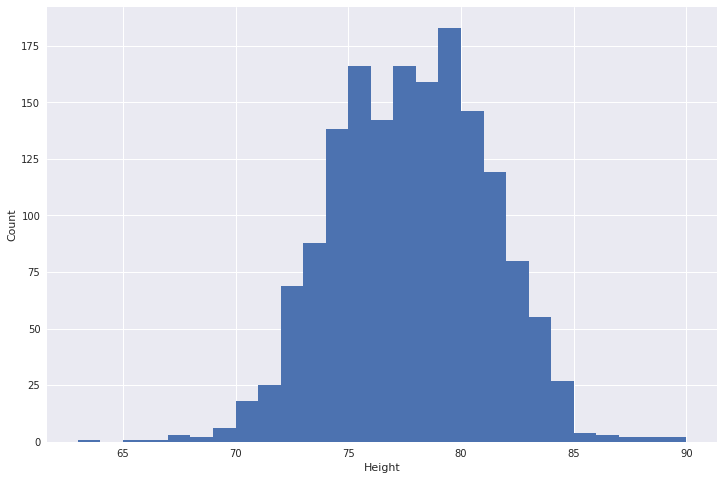

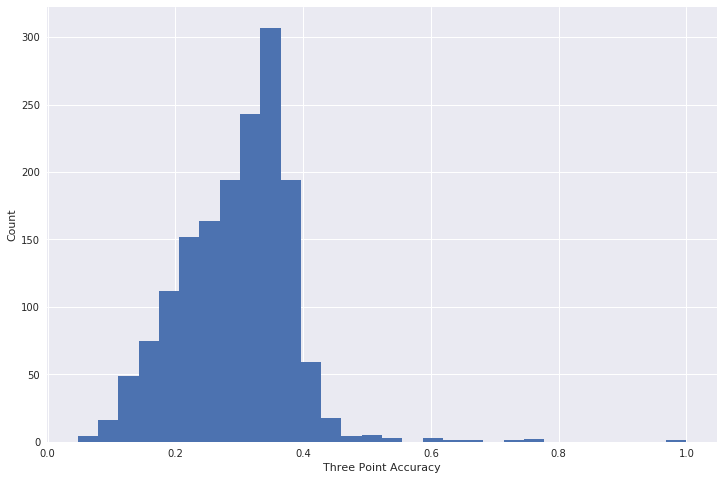

In [9]:
# Height Histogram
plt.hist(height, bins=27)
plt.xlabel("Height")
plt.ylabel("Count")
plt.show()

# Accuracy Histogram
plt.hist(accuracy, bins=30)
plt.xlabel("Three Point Accuracy")
plt.ylabel("Count")
plt.show()

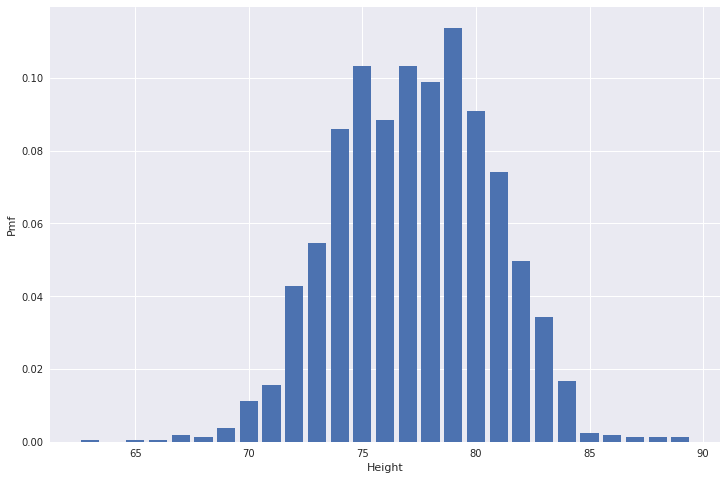

In [10]:
# Height PMF Plot
pmf, val = np.histogram(height, bins=27, density=True)
plt.bar(val[:-1], pmf)
plt.xlabel("Height")
plt.ylabel("Pmf")
plt.show()

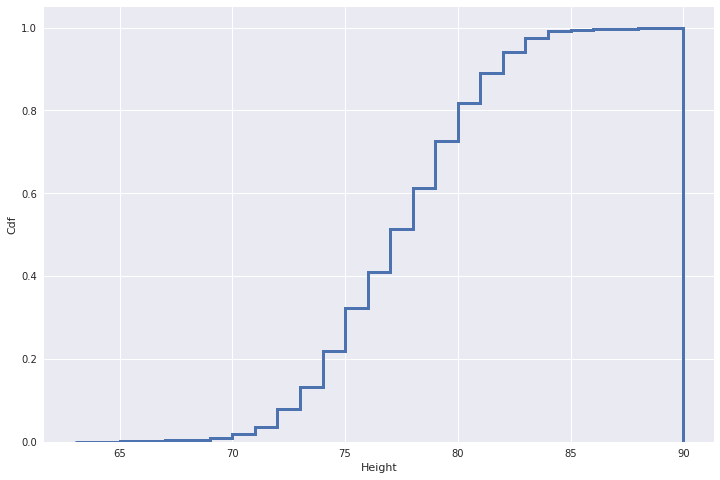

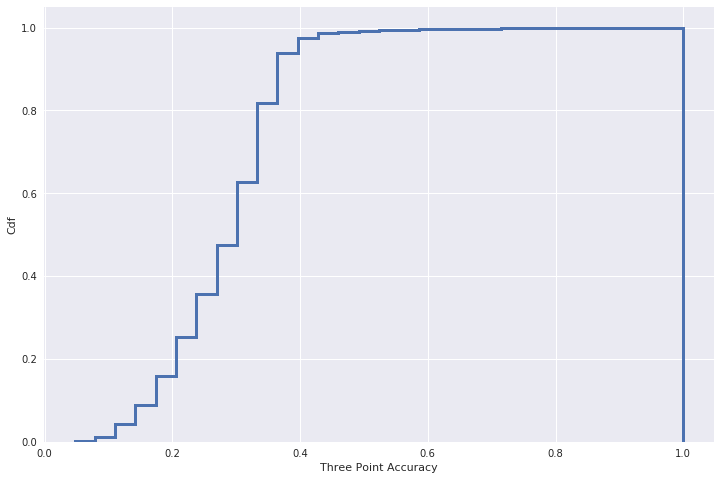

In [11]:
# Height CDF Plot
plt.hist(height, density=True, cumulative=True, label='CDF', histtype='step', bins=27, linewidth=3)
plt.xlabel("Height")
plt.ylabel("Cdf")
plt.show()

# Height CDF Plot
plt.hist(accuracy, density=True, cumulative=True, label='CDF', histtype='step', bins=30, linewidth=3)
plt.xlabel("Three Point Accuracy")
plt.ylabel("Cdf")
plt.show()

## Section 4

Histogram of both height and three point accuracy hints that normal distribution can fits the data well

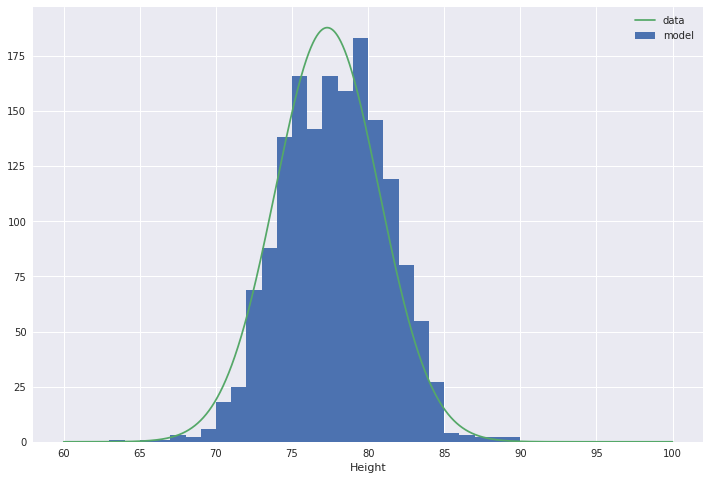

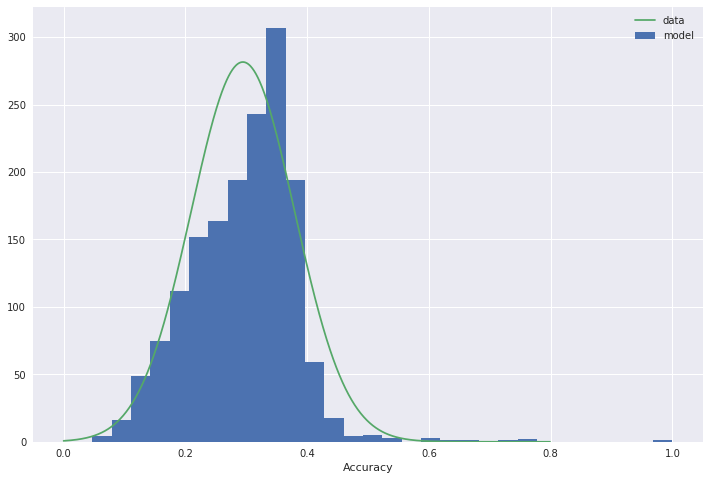

In [12]:
plt.hist(height, bins=27)
plt.xlabel("Height")
x_axis = np.arange(60, 100, 0.001)
plt.plot(x_axis, norm.pdf(x_axis,height.mean(),height.std()) * height.shape[0])
plt.legend(["data", "model"])
plt.show()

plt.hist(accuracy, bins=30)
plt.xlabel("Accuracy")
x_axis = np.arange(0, 0.8, 0.001)
plt.plot(x_axis, norm.pdf(x_axis, accuracy.mean(), accuracy.std()) * 60)
plt.legend(["data", "model"])
plt.show()

## Section 5

Scatter plot does not say much about relation between height of the player and hist three point accuracy.

Correlation is calculated as -0.13. This results implies that there might be a weak negative correlation between variables. In other words, accuracy of three points decreases as height of the player increases.statistical tests should be applied (Section 6) to show that it is not just some spurious correlation but an actual relation.

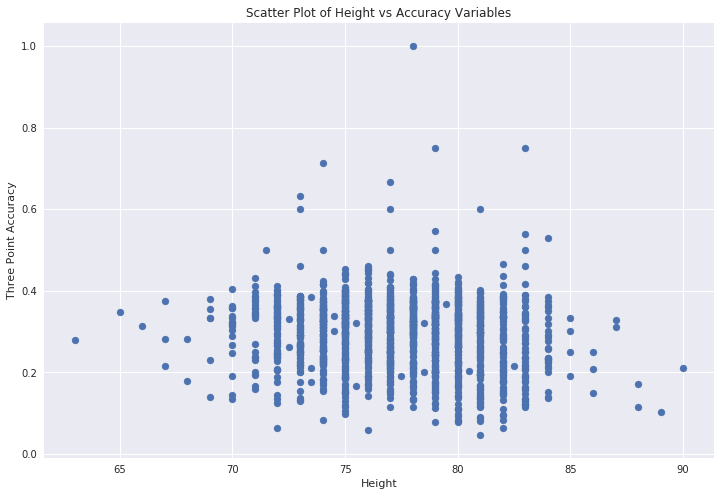

Correlation between height and accuracy : -0.13154889056643443


In [13]:
plt.scatter(height, accuracy)
plt.xlabel("Height")
plt.ylabel("Three Point Accuracy")
plt.title("Scatter Plot of Height vs Accuracy Variables")
plt.show()

coer = np.corrcoef(height, accuracy)[0, 1]
print("Correlation between height and accuracy : %s" % coer)

## Section 6 - Null hypothesis for pearson correlation

Null hypothesis : There is no statistically significant relationship between height variable and three point accuracy variable.

Since 0.05 threshold value is commonly used, we also use this value to test significance of this relation.

After applying test, p value is calculated as $1.197 x 10^-7$. This value is much smaller than 0.05 therefore we can say that we reject null hypothesis, so there is a relationship between height and three point accuracy.

In [14]:
from scipy.stats.stats import pearsonr

coerr, p = pearsonr(height, accuracy)

print("Correlation : %s" % coerr)
print("P-value : %s" % p)

Correlation : -0.13154889056643446
P-value : 1.1966077179807655e-07


## Section 7 - Conclusion

We tried to find statistically relation between height and 3 point accuracy of NBA basketball players. Some analysis on data show that these values are distributed normally. Scatter plot and correlation coefficient show that there might be a weak relation between these variables. Correlation value is calculated as -0.13.

To show that this correlation is not some random occurence, null hypothesis test is applied. Null hypothesis is contructed as "There is no statistically significant relationship between height of player and three point accuracy, assuming that the player has made at least 3 attemps". Low p value we calculated in section 6 proof that it is unlikely to observe such relation in two uncorrelated variable. In other words, our sample provides enough evidence to reject null hypothesis. So, there is a statistically significant relation between two variable although this relation is not strong.